# Day 8: Model Comparison

Now that we have trained **Random Forest** and **Gradient Boosting** models,  
let’s compare their performance using **Mean Squared Error (MSE)** and **R² Score**.  

We’ll visualize the results to see which model is performing better.


In [4]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load saved train-test splits from Day 7
X_train = joblib.load("X_train.pkl")
X_test = joblib.load("X_test.pkl")
y_train = joblib.load("y_train.pkl")
y_test = joblib.load("y_test.pkl")

# Load models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

# Metrics
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

gb_mse = mean_squared_error(y_test, gb_preds)
gb_r2 = r2_score(y_test, gb_preds)


📊 Model Comparison Results:
                        MSE        R2
Model                                
Random Forest      0.236094  0.981645
Gradient Boosting  0.181850  0.985862


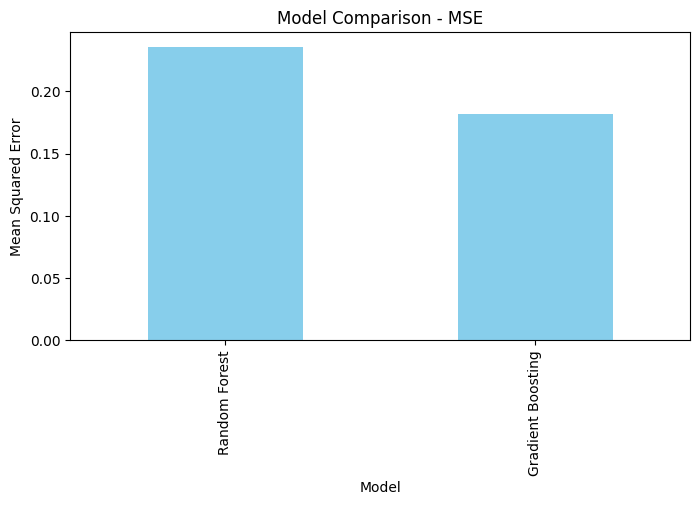

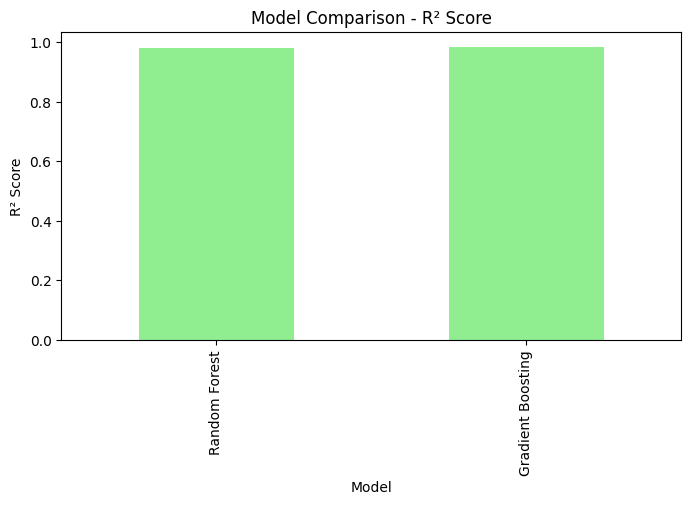

In [5]:
# Put results in a DataFrame
results_df = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosting"],
    "MSE": [rf_mse, gb_mse],
    "R2": [rf_r2, gb_r2]
}).set_index("Model")

print("📊 Model Comparison Results:")
print(results_df)

# Bar plot for MSE
plt.figure(figsize=(8,4))
results_df["MSE"].plot(kind="bar", color="skyblue")
plt.title("Model Comparison - MSE")
plt.ylabel("Mean Squared Error")
plt.show()

# Bar plot for R²
plt.figure(figsize=(8,4))
results_df["R2"].plot(kind="bar", color="lightgreen")
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.show()


### ✅ Conclusion
- Both models perform **very well** on the test set.  
- **Gradient Boosting** has a slightly lower MSE and higher R²,  
  making it the better model at this stage.  
- Next, we’ll move to **hyperparameter tuning (Day 9)**  
  to optimize these models further.
